# Stage-Volume Relationships for Rainy and Namakan Lakes

Stage-Volume relationships expresses the relationship between lake surface elevation and the amount of water stored in the lake. For most flow and rule curve calculations, the most important feature of the stage-volume relationship is the change in lake volume associated with a change in lake volume.

This notebook displays stage-volume relationship data for Rainy Lake and Namakan Reservoir obtained from

>Thompson, A.F. (2013). Rainy and Namakan Hydrologic Response Model Documentation. Prepared for the Evaluation of the International Joint Commission 2000 Order for Rainy and Namakan Lakes and Rainy River.

The data is fitted to a polynomial function to create a dictionary of interpolation functions 

```
volume[key]()
```

and differentiated to create a dictionary of area functions 

```
area[key]()
```

These are pickled and stored in the data directory in files of the same name.

### Initialization

Initilization of the graphics system and computational modules used in this IPython notebook.

In [8]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# Data directory
dir = '../data/'
img = '../images/'

## Stage-Volume Data

The following data is extracted from Tables 1 and 2 of the Thompson report. The data is stored in a dictionary constructed as key, dataframe pairs.

In [9]:
data = {}

data['Rainy Lake'] = pd.DataFrame(
        [[335.0,  112.67],
        [336.0,  798.00],
        [336.5, 1176.42],
        [337.0, 1577.25],
        [337.5, 2002.06],
        [338.0, 2450.57],
        [339.0, 3416.85],
        [340.0, 4458.97]],
    columns = ['stage','volume'])

data['Namakan Reservoir'] = pd.DataFrame(
        [[337.0,  65.33],
        [338.0,  259.95],
        [338.5,  364.20],
        [339.0,  475.58],
        [339.5,  592.46],
        [340.0,  712.28],
        [340.5,  836.56],
        [341.0,  966.17],
        [341.5, 1099.79],
        [342.0, 1239.68],
        [343.0, 1540.75]],
    columns = ['stage','volume'])

Everything from this point on should be automatic and require no editing.

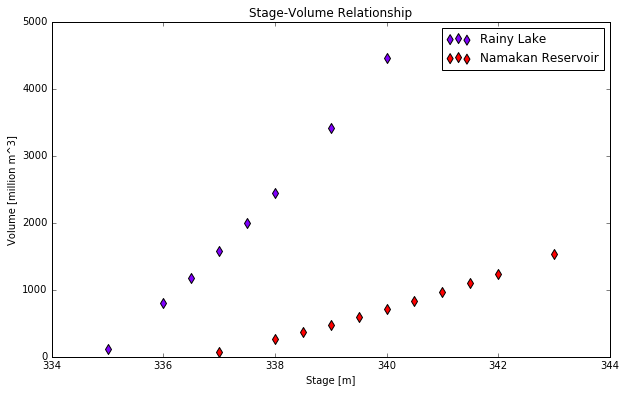

In [10]:
import matplotlib.cm as cm
colors = dict(zip(data.keys(),cm.rainbow(np.linspace(0, 1, len(data)))))

plt.figure(figsize=(10,6))
axes = plt.subplot()
plt.hold(True)
for key in data.keys():
    data[key].plot(
        x = 'stage', 
        y = 'volume', 
        kind='scatter', 
        color = colors[key],
        s=50, marker='d', 
        ax = axes)
plt.hold(False)

plt.xlabel('Stage [m]')
plt.ylabel('Volume [million m^3]')
plt.title('Stage-Volume Relationship')
plt.legend(data.keys())
plt.xlim([334,344])
plt.ylim([0,5000]);

## Fitting the Stage-Volume Relationship

Numpy provides functions to fit data to a polynomial of arbitrary degree, and to create a 1d interpolation based on the result.

In [11]:
volume = {}

for key in data.keys():
    volume[key] =  np.poly1d(np.polyfit(data[key]['stage'],data[key]['volume'],2))
    print "\n",key,"\n",volume[key]


Rainy Lake 
       2
45.37 x - 2.975e+04 x + 4.876e+06

Namakan Reservoir 
       2
10.14 x - 6653 x + 1.09e+06


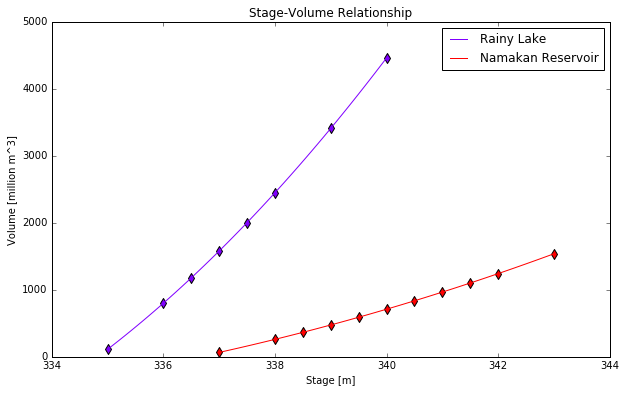

In [12]:
plt.figure(figsize=(10,6))

axes = plt.subplot()
plt.hold(True)
for key in data.keys():
    data[key].plot(
        x = 'stage', 
        y = 'volume', 
        kind='scatter', 
        color = colors[key],
        s=50, marker='d', 
        ax = axes)
    h = np.linspace(data[key]['stage'].min(),data[key]['stage'].max())
    plt.plot(h,volume[key](h),color=colors[key])
plt.hold(False)

plt.xlabel('Stage [m]')
plt.ylabel('Volume [million m^3]')
plt.title('Stage-Volume Relationship')
plt.legend(data.keys())
plt.xlim([334,344])
plt.ylim([0,5000]);

plt.savefig('../images/Stage-Volume.png')

## Stage-Area Relationships

The stage-area relationship expresses the dependence of lake area on lake elevation. 

In [13]:
area = {}
for key in data.keys():
    area[key] = volume[key].deriv()
    print "\n",key,"\n",area[key]


Rainy Lake 
 
90.73 x - 2.975e+04

Namakan Reservoir 
 
20.29 x - 6653


(334, 344)

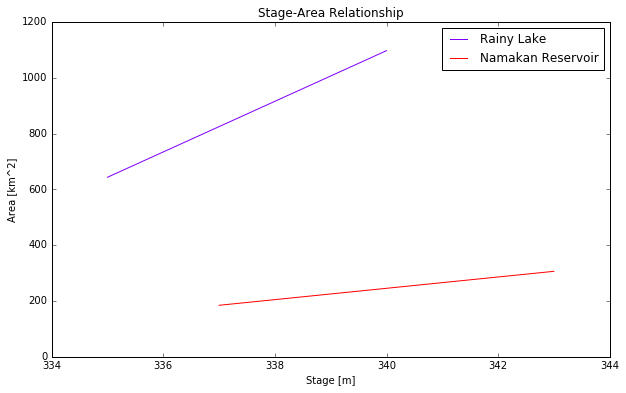

In [15]:
plt.figure(figsize=(10,6))

axes = plt.subplot()
plt.hold(True)
for key in data.keys():
    h = np.linspace(data[key]['stage'].min(),data[key]['stage'].max())
    plt.plot(h,area[key](h),color=colors[key])
plt.hold(False)

plt.xlabel('Stage [m]')
plt.ylabel('Area [km^2]')
plt.title('Stage-Area Relationship')
plt.legend(data.keys())
plt.xlim([334,344])

## Save Results

In [16]:
import pickle

file = open('data/area.pkl', 'w')  
pickle.dump(area, file)
file.close()

file = open('data/volume.pkl', 'w')  
pickle.dump(volume, file)
file.close()

In [17]:
file = open('data/area.pkl', 'r')  
area = pickle.load(file)
file.close()

file = open('data/volume.pkl', 'r')  
volume = pickle.load(file)
file.close()
